# Preprocessing
* Notes
    * for now it seems that the other morphological processes do not greatly enhance the image, before skeletonization
    * sk

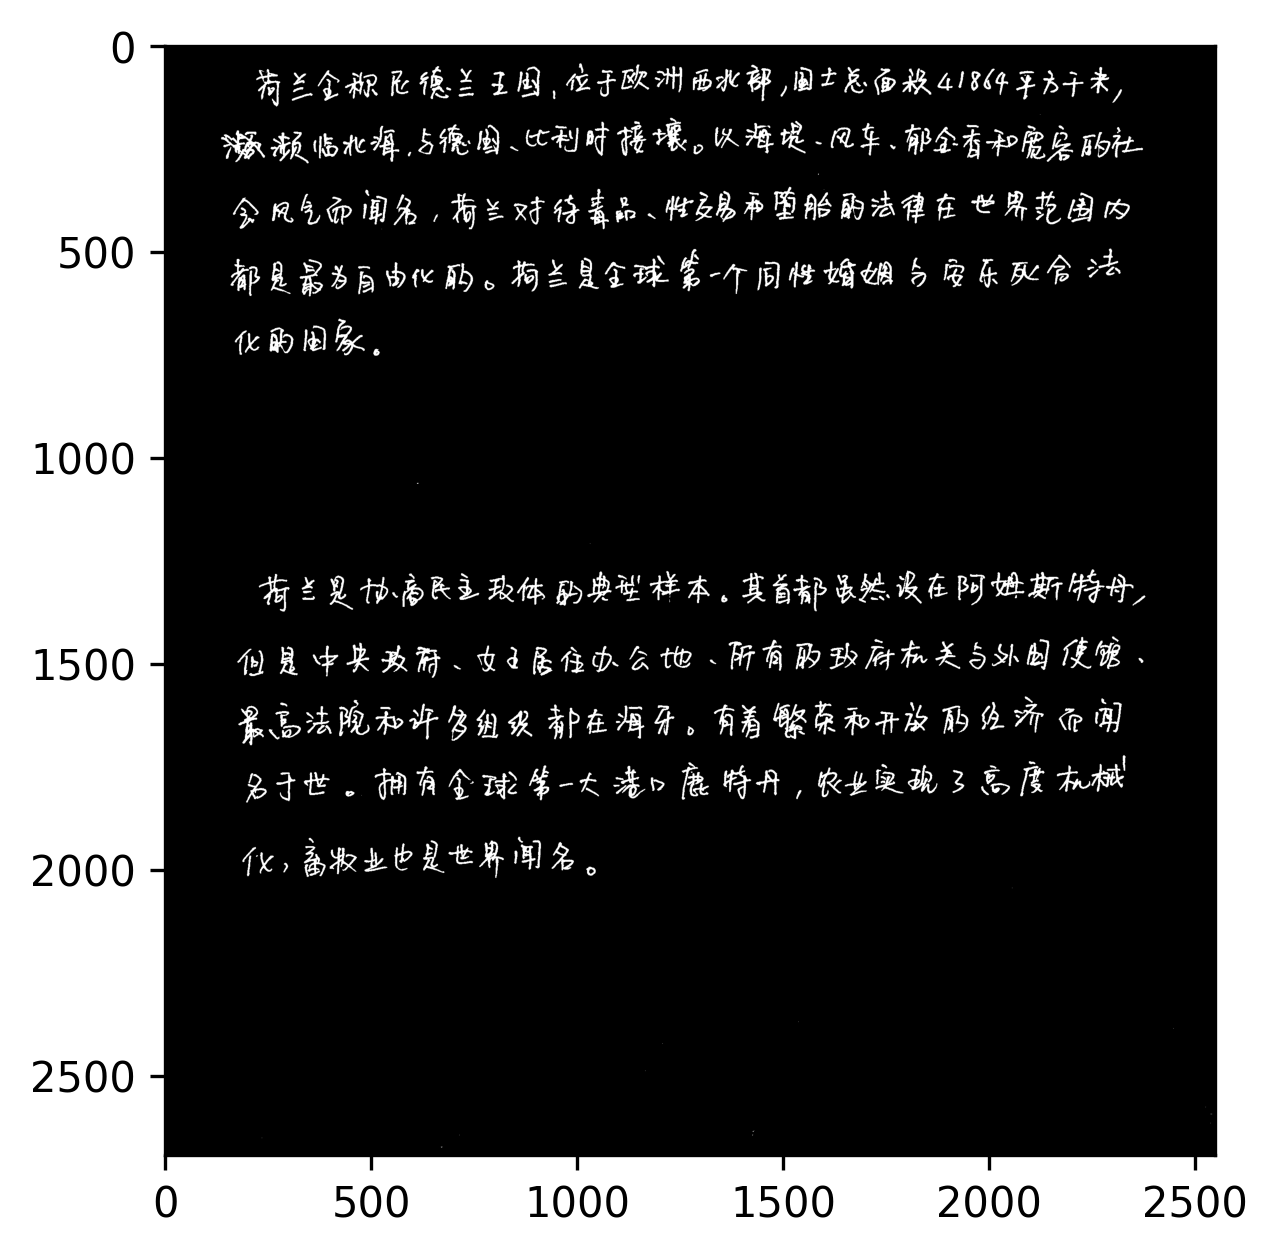

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

#set dpi
mpl.rcParams['figure.dpi'] = 300

cerug_1 = cv2.imread(r'./CERUG/Writer0202_01.ppm')
cerug_1 = cv2.cvtColor(cerug_1, cv2.COLOR_BGR2GRAY) #convert to gs
cerug_1_bin = cv2.threshold(cerug_1, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] #threshold and invert image at the same time

#NOTE: imshow reduces the resolution
plt.imshow(cerug_1_bin, cmap='gray')

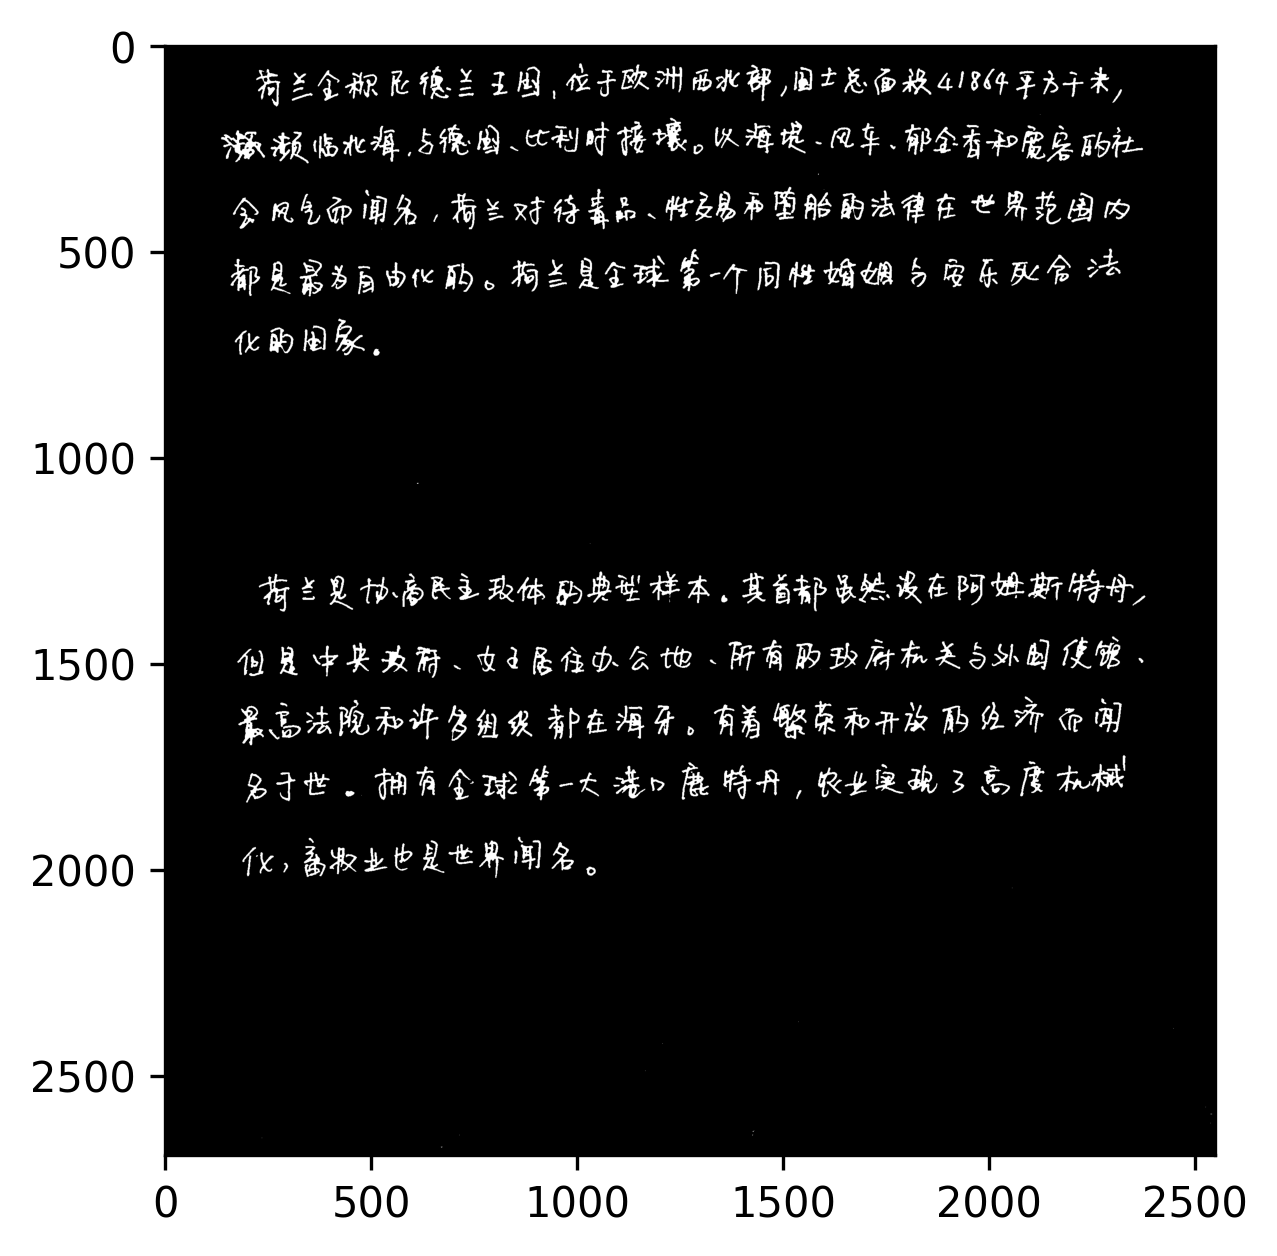

In [2]:
import numpy as np
kernel = np.ones((3, 3))
#attempt a morphological closing
cerug_1_closing = cv2.morphologyEx(cerug_1_bin, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('./output/cerug_1_closing.png', cerug_1_closing*255)

plt.imshow(cerug_1_closing, cmap='gray')

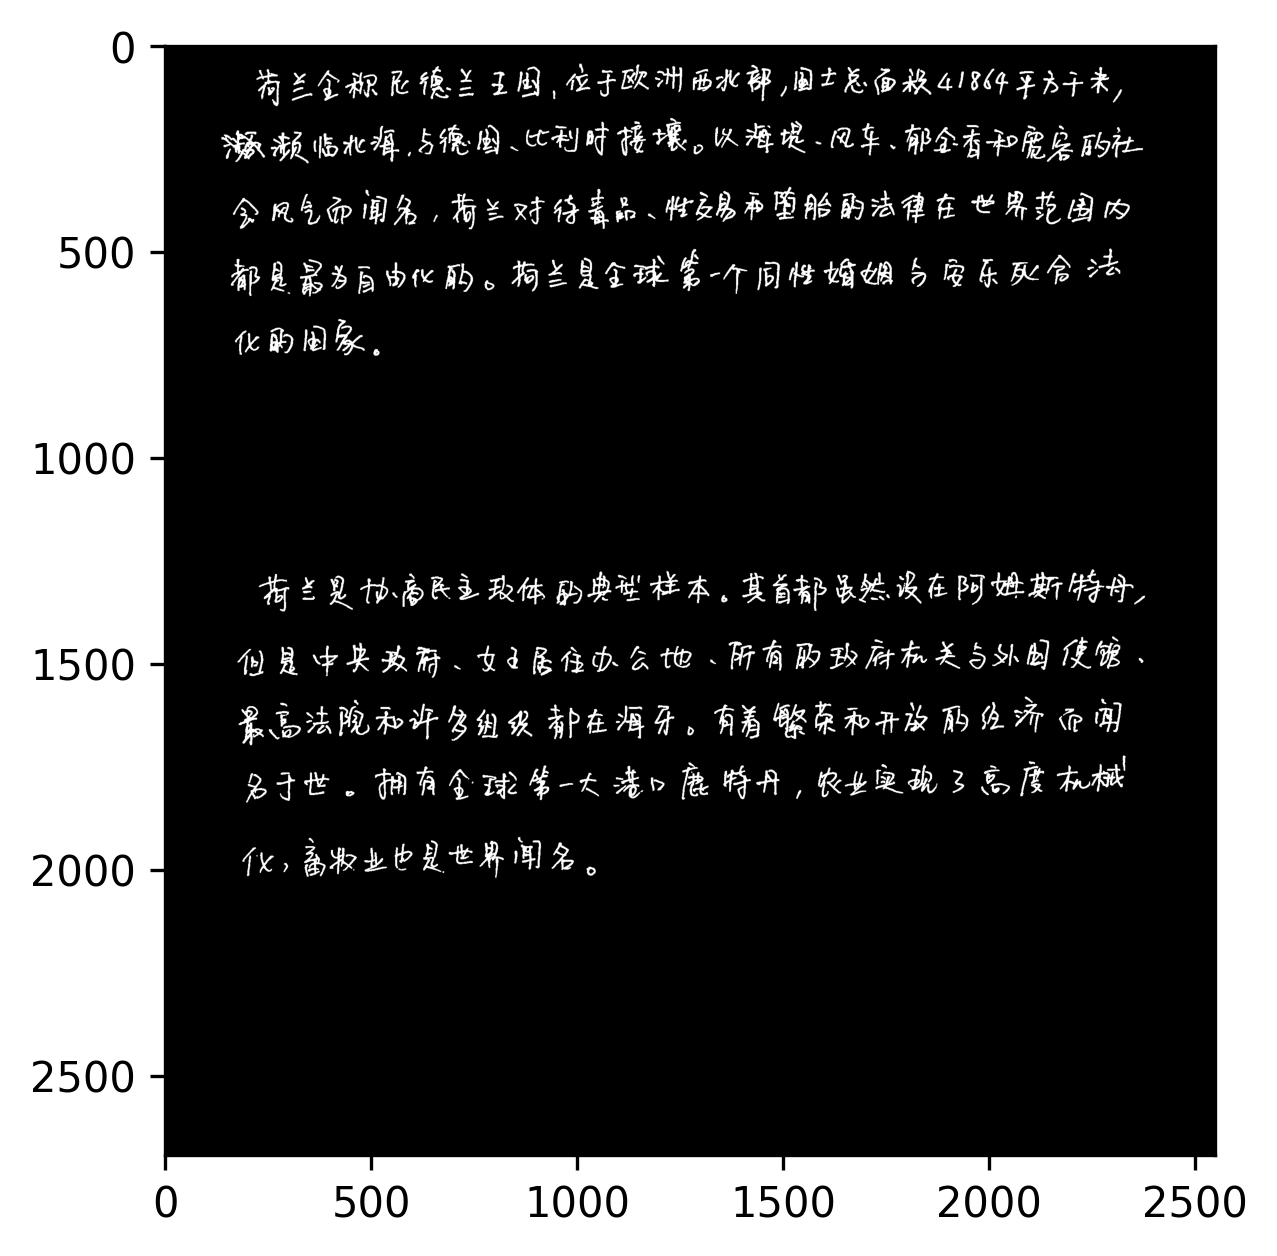

In [3]:
#attempted opening
cerug_1_opening = cv2.morphologyEx(cerug_1_bin, cv2.MORPH_OPEN, kernel)

cv2.imwrite('./output/cerug_1_opening.png', cerug_1_opening*255)
plt.imshow(cerug_1_opening, cmap='gray')

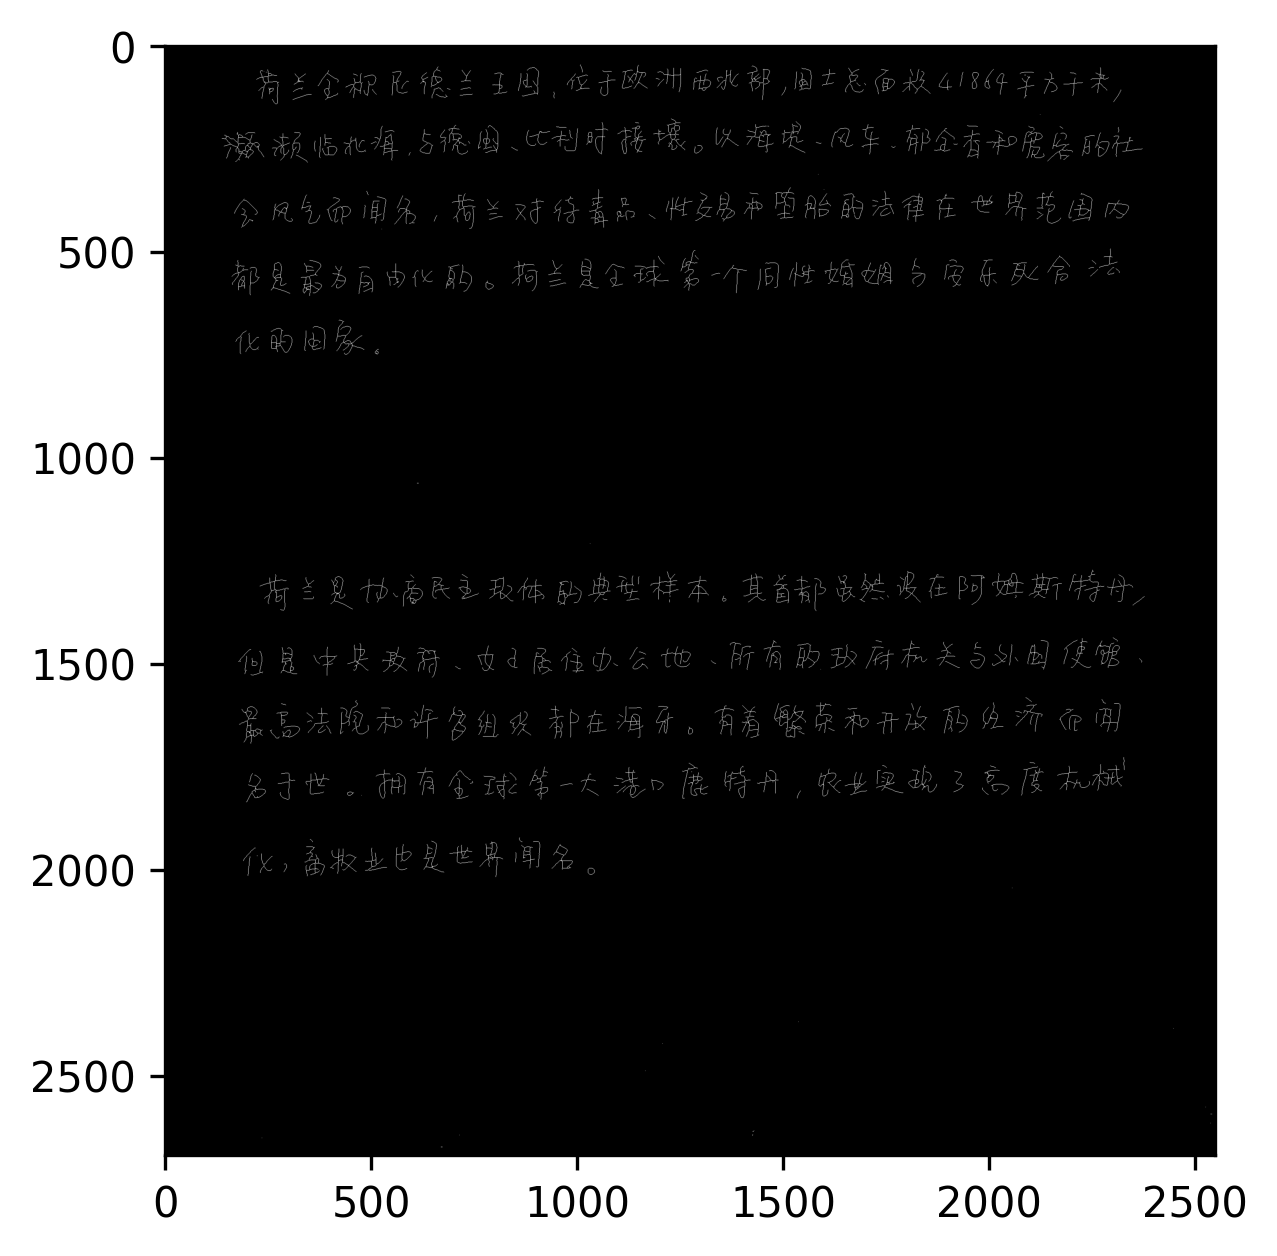

In [4]:
from skimage.morphology import skeletonize, thin

cerug_1_bin = cerug_1_bin.astype(bool)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
cerug_1_skele = skeletonize(cerug_1_bin)
cerug_1_thin = thin(cerug_1_bin)

cv2.imwrite('./output/cerug_1_skeletonized.png', cerug_1_skele*255)
cv2.imwrite('./output/cerug_1_thinned.png', cerug_1_thin*255)

plt.imshow(cerug_1_skele, cmap='gray')

In [5]:
cerug_1_open_skelethon = skeletonize(cerug_1_opening)
cv2.imwrite('./output/cerug_1_open_skeleton.png', cerug_1_open_skelethon*255)

True

In [6]:
cerug_1_erosion = cv2.morphologyEx(cerug_1_bin.astype(np.uint8), cv2.MORPH_ERODE, kernel)
cerug_1_erode_skeleton = skeletonize(cerug_1_erosion)
cv2.imwrite('./output/cerug_1_erode_skelethon.png', cerug_1_erode_skeleton*255)

True

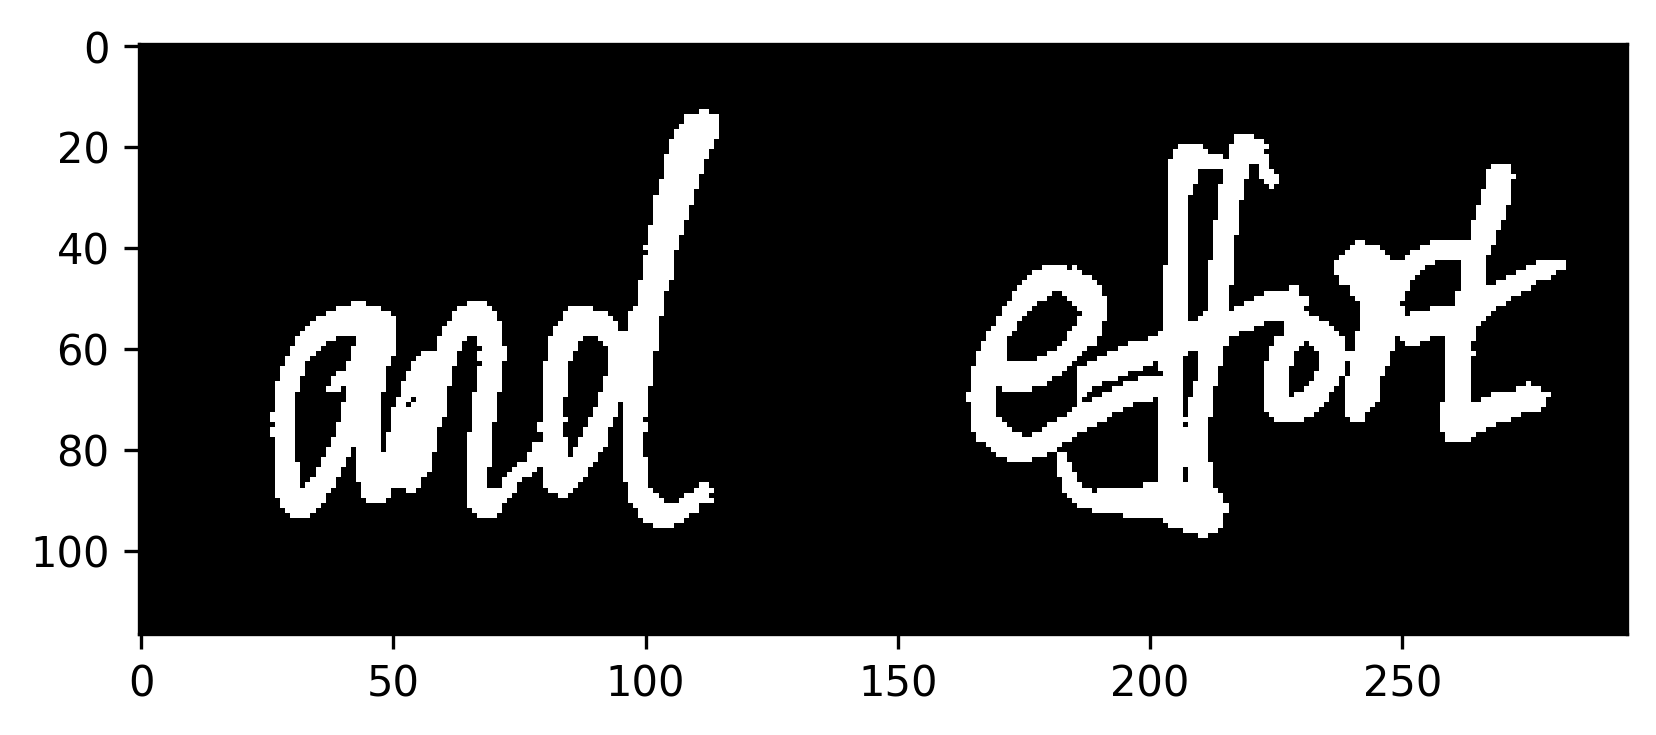

In [7]:
eng_test = cv2.imread(r'CERUG_EN_Test.png')
eng_test = cv2.cvtColor(eng_test, cv2.COLOR_BGR2GRAY) #convert to gs
eng_test = cv2.threshold(eng_test, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] #threshold and invert image at the same time

#NOTE: imshow reduces the resolution
plt.imshow(eng_test, cmap='gray')

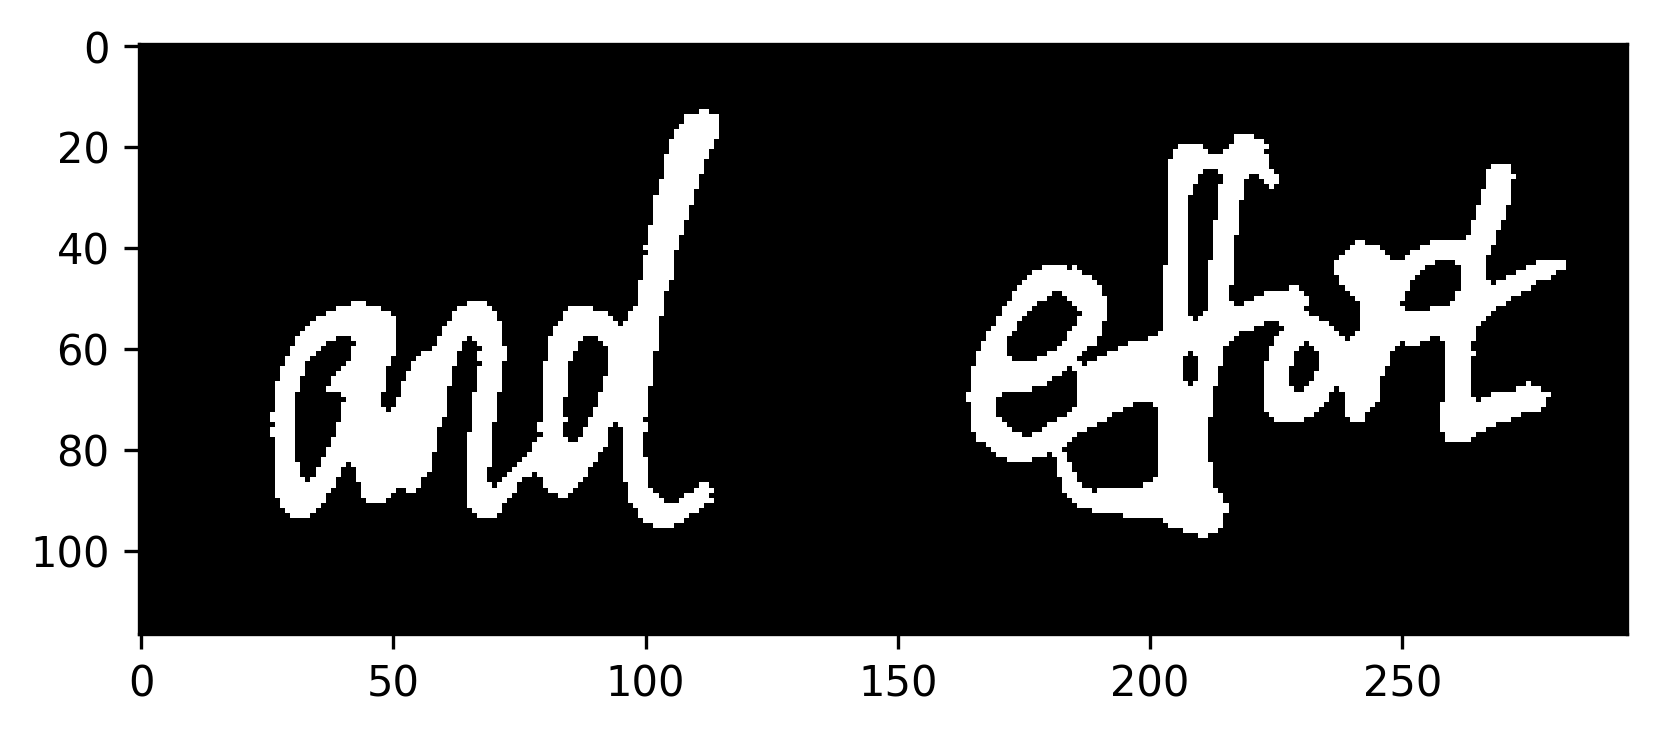

In [8]:
eng_test_closing = cv2.morphologyEx(eng_test, cv2.MORPH_CLOSE, kernel) #doesn't work because it merges holes larger than i'd like
plt.imshow(eng_test_closing, cmap='gray')

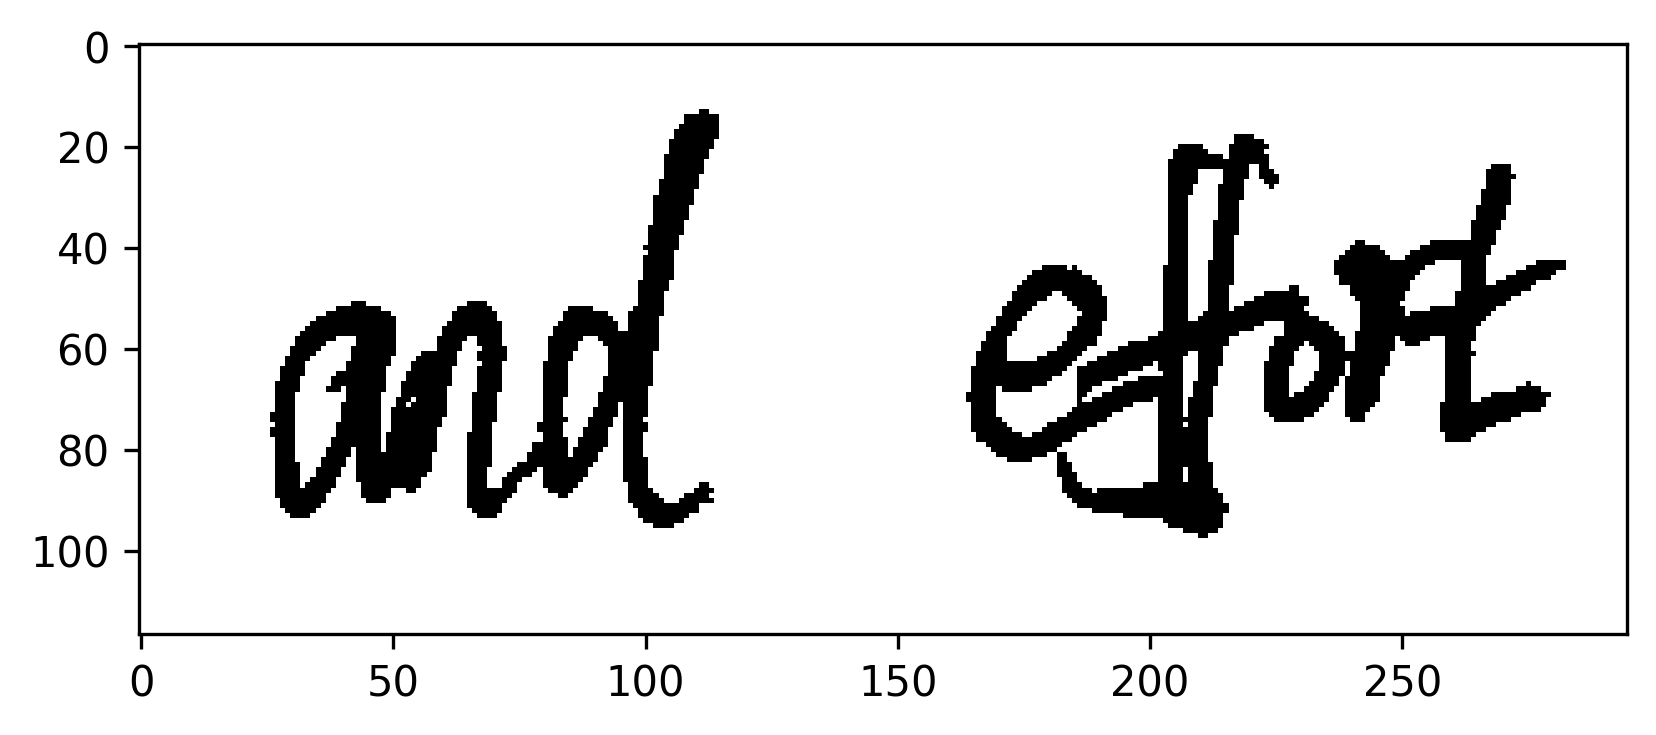

In [9]:
eng_test_c = ~eng_test
plt.imshow(eng_test_c, cmap='gray')

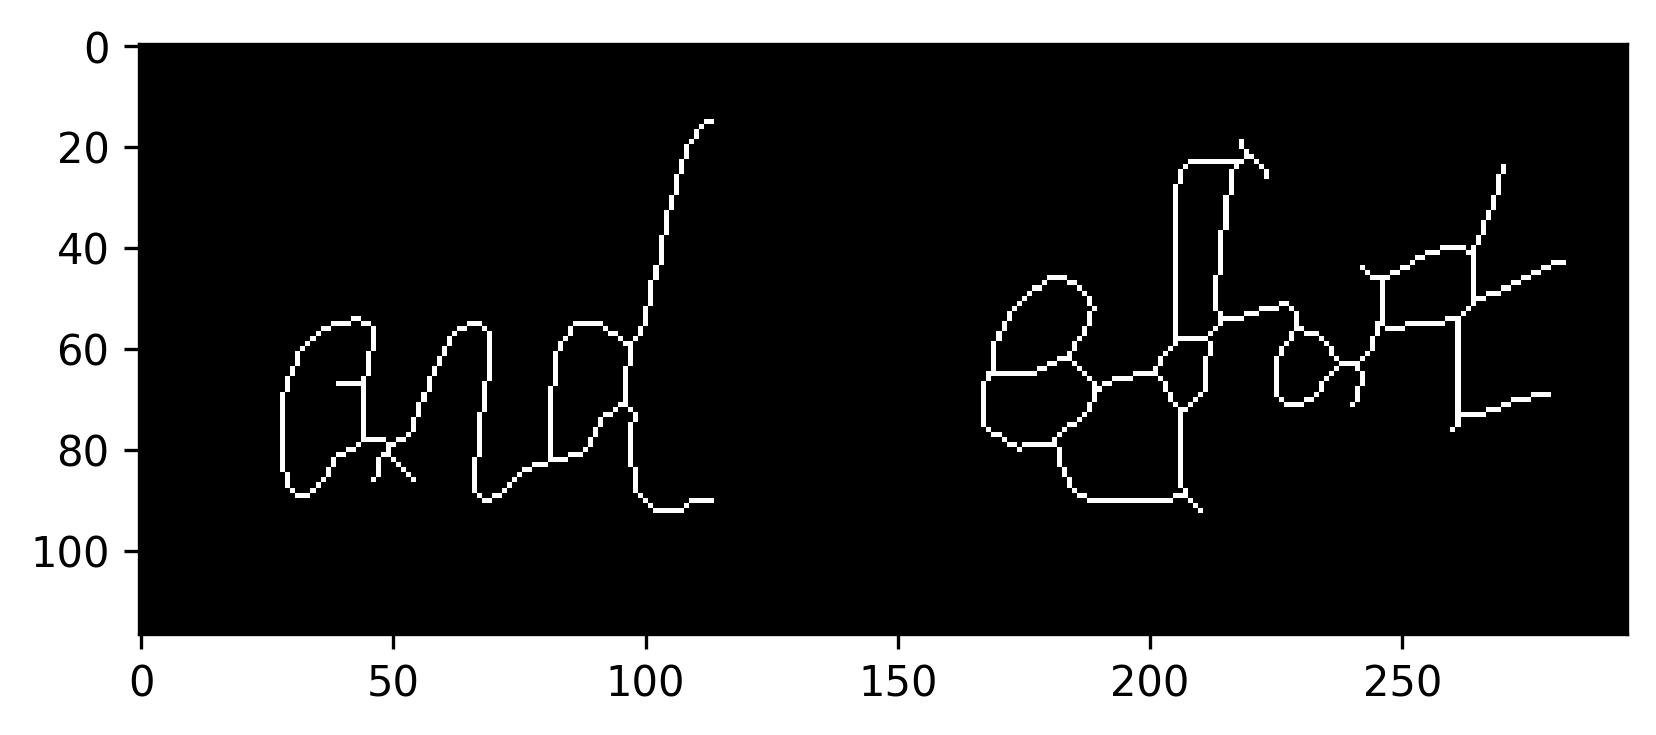

In [10]:

eng_test_closing = cv2.morphologyEx(eng_test, cv2.MORPH_CLOSE, kernel)
eng_test_skele = skeletonize(eng_test_closing)

plt.imshow(eng_test_skele, cmap='gray')

/tmp/ipykernel_13315/418357262.py:2: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  eng_test_shr = remove_small_holes(eng_test, 4)


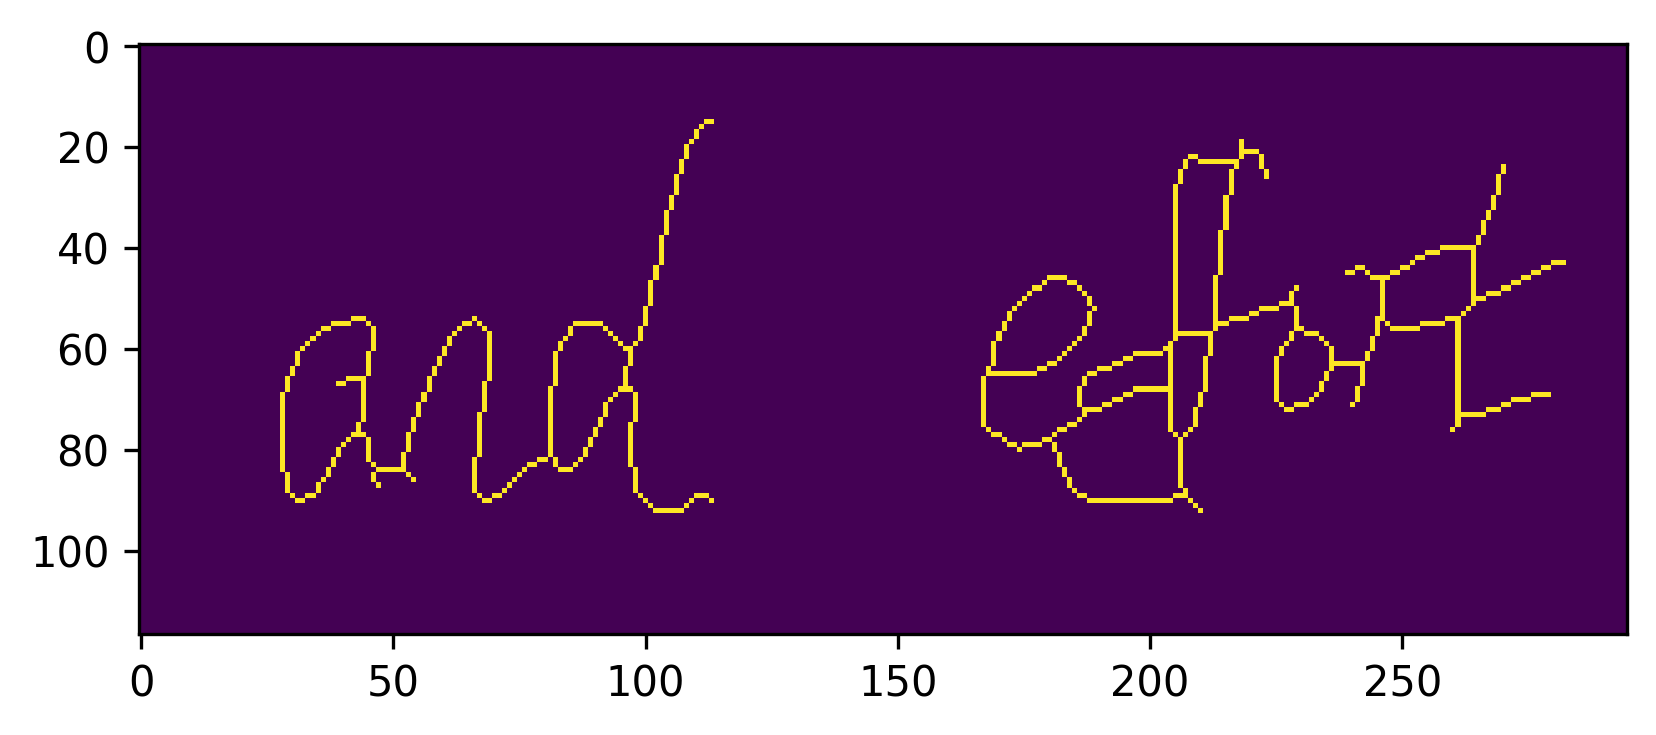

In [11]:
from skimage.morphology import remove_small_holes
eng_test_shr = remove_small_holes(eng_test, 4)

plt.imshow(skeletonize(eng_test_shr))